<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/6-3%20%EC%A3%BC%EC%84%B1%EB%B6%84%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주성분 분석**

## **차원과 차원 축소**

데이터가 가진 **속성**은 **특성(feature)**이라고도 부를 수 있습니다. 전 챕터에서 다뤘던 과일 데이터는 픽셀 10,000개를 가졌으므로 특성 10,000개를 가진 것입니다. 추가로 이런 특성을 **차원(demension)**이라고 부르기도 합니다. 특성 10,000개는 차원 10,000개입니다.

다차원 배열의 차원과 1차원 배열의 차원은 다릅니다. 다차원 배열과 1차원 배열(**벡터(vector)**)에서 차원이라는 용어는 다르게 사용합니다. 다차원 배열의 경우 차원은 배열의 축 개수를 의미합니다. 

가령 2차원 배열일 경우 행과 열이 차원입니다. 첫 번째 축인 행과 두 번째 축인 열이 있으므로 2차원입니다. 반면 1차원 배열일 경우 원소 개수가 차원입니다. 원소 5개가 있다면 5차원 벡터입니다.

아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)을 참고하면 이해하기 쉽습니다.

<img src='https://drive.google.com/uc?export=view&id=1VSOObccPOgnAglYZMcRU_cpCsUwKkhnA'>

특성(차원)이 클수록 저장 공간은 커집니다. 비지도 학습 작업 중 하나인 **차원 축소(dimensionality reduction)** 알고리즘을 통해 차원을 줄이면 저장 공간을 크게 절약할 수 있습니다. 대표적인 차원 축소 알고리즘은 **주성분 분석(principal component analysis)**입니다.

차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있는 방법입니다. 줄어든 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수도 있습니다.

## **주성분 분석 소개**

**주성분 분석(principal component analysis)**은 줄여서 **PCA**라고 부르며, 데이터 분산(데이터가 널리 퍼져있는 정도)이 큰 방향을 찾는 방법입니다. 데이터 분산이 큰 방향은 데이터를 잘 표현하는 벡터를 의미합니다.

2차원 데이터를 예로 들어서 아래 그림(출처: 혼자 공부하는 머신러닝 + 딥러닝)으로 설명하겠습니다.

<img src='https://drive.google.com/uc?export=view&id=1ZXmEyWmC6VoH2HQuC21rljiHEmn5V5Bl' width = 50% >
 
이 데이터는 x1, x2 라는 특성 2개가 있습니다. 대각선으로 길게 늘어진 형태입니다.

<img src='https://drive.google.com/uc?export=view&id=1fimjCebPmegOfWtnnTxO_icM88fRG6HM' width = 50%>
 
분산이 가장 큰 방향, 즉 데이터 분포를 가장 잘 표현하는 방향을 나타냅니다. 직관적으로 보면 길게 늘어진 대각선 방향은 분산이 가장 큽니다. 화살표가 오른쪽 위로 향하든 왼쪽 아래로 향하든 큰 의미는 없습니다. 분산이 큰 방향을 찾는 것이 중요합니다.

<img src='https://drive.google.com/uc?export=view&id=1KfgnqH7w01OxvRjVXdocUSqPvDKJlPRx' width = 50%>
 
이 직선이 원점에서 출발한다면 (2, 1)처럼 두 원소로 이루어진 벡터로 쓸 수 있습니다. 실제로 PCA 모델을 훈련하면 자동으로 특성마다 평균값을 빼서 원점에 맞춰 주므로 데이터를 직접 원점에 맞출 필요가 없습니다. 이 벡터를 **주성분(Principal component)**이라고 부르며 원본 데이터에 있는 어떤 방향을 의미합니다. 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같습니다.

<img src='https://drive.google.com/uc?export=view&id=1wzK0Lijl1aaENTuXAkgiiVktx3vK64Xi' width = 50%>

주성분을 사용하여 원본 데이터의 차원을 줄일 수 있습니다. 예컨대, 샘플 S(4, 2)를 주성분에 직각으로 투영하면 1차원 데이터 P(4, 5)를 만들 수 있습니다. 주성분은 원본 차원(특성)과 같고, 주성분으로 바꾼 데이터는 차원(특성)이 줄어듭니다. 주성분은 가장 분산이 큰 방향이기 때문에 주성분에 투영하여 바꾼 데이터는 원본이 가진 특성을 가장 잘 나타냅니다.

<img src='https://drive.google.com/uc?export=view&id=1aGSY0zm3RKysNsSkRGbjnBbFyHz2GWOO' width = 50%>

첫 번째 주성분을 찾은 다음 이 벡터에 수직이면서 분산이 가장 큰 다음 방향을 찾으면, 이렇게 찾은 벡터가 두 번째 주성분입니다. 여기서는 2차원이기 때문에 두 번째 주성분의 방향은 그림처럼 하나뿐입니다.
 
기술적인 이유로 주성분은 원본 특성 개수와 샘플 개수 중 작은 값만큼 찾을 수 있습니다. 일반적으로 대량 데이터에서 비지도 학습을 수행하기 때문에 원본 특성의 개수만큼 주성분을 찾습니다. 

## **PCA 클래스**

`PCA` 클래스는 주성분 분석을 수행하는 도구입니다. 아래는 매개변수와 속성, 메서드 목록입니다. 

- `n_components`: 주성분 개수를 지정하는 매개변수입니다. 기본값은 `None`으로 샘플 개수와 특성 개수 중 작은 것의 값을 사용합니다.

- `random_state`: 넘파이 난수 시드 값을 지정하는 매개변수입니다.

- `components_`: 훈련 세트에서 찾은 주성분이 저장되는 속성입니다.

- `explained_variance_`: 설명된 분산이 저장되는 속성입니다.

- `explained_variance_ratio_`: 설명된 분산의 비율이 저장되는 속성입니다.

- `inverse_transform()`: `transform()` 메서드로 차원을 축소시킨 데이터를 다시 원본 차원으로 복원하는 메서드입니다.

### **데이터 준비**

과일 사진 데이터를 준비하겠습니다.

In [20]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

--2022-01-19 08:53:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-01-19 08:53:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-01-19 08:53:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

`PCA()` 클래스 생성기로 인스턴스를 만들 때 `n_components` 매개변수에 주성분 개수를 지정해야 합니다. 비지도 학습이므로 `fit()` 메서드에 타깃값을 제공하지 않습니다.

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_)
print(pca.components_.shape)

[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701613e-05 -1.13551048e-05 -1.82152562e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220499e-05 -2.08401755e-05 -2.89870156e-05 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 2.95375646e-05 -4.82131484e-05 -1.48333848e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-2.03595600e-05  9.36137368e-05  1.09507140e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 7.68573925e-05  2.36460881e-05  4.64676421e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
(50, 10000)


`n_components` 매개변수를 50으로 지정했기 때문에 `pca.components_` 배열의 첫 번째 차원이 50입니다. 주성분 50개를 찾은 것입니다. 두 번째 차원은 원본 데이터의 특성 개수와 같은 10,000입니다. 원본 데이터와 차원이 같으므로 주성분을 $100 \times 100$ 크기의 이미지처럼 출력할 수 있습니다. 이전 챕터에서 사용했던 `draw_fruits()` 함수로 그림을 그리겠습니다.

In [22]:
import matplotlib.pyplot as plt

In [23]:
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), 
                            squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')
            axs[i, j].axis('off')

    plt.show()

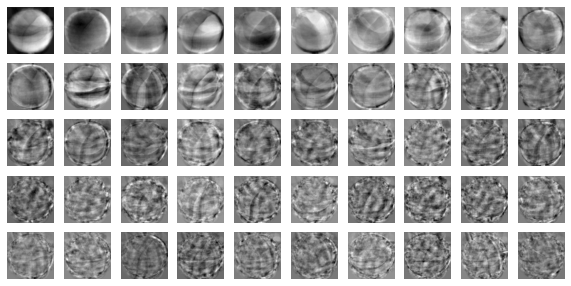

In [24]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

괴상한 사진이 출력됐습니다. 이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것입니다. 한편으로는 데이터셋에 있는 어떤 특징을 잡아낸 것으로도 생각할 수 있습니다.

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성 개수를 10,000개에서 50개로 줄일 수 있습니다. 원본 데이터를 각 주성분으로 분해한다고 생각할 수 있습니다. `PCA` 클래스의 `transform()` 메서드를 사용하여 원본 데이터의 차원을 50으로 줄이겠습니다.

In [25]:
print(fruits_2d.shape)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


차원이 10,000에서 50으로 줄었습니다. $\frac{1}{200}$ 수준으로 줄어든 것입니다. `fruits_2d` 대신 `fruits_pca`를 저장하면 저장 공간을 훨씬 줄일 수 있습니다.

### **원본 데이터 재구성**

차원을 줄이면 데이터에 어느 정도 손실이 가해질 수밖에 없습니다. 다만 최대한 분산이 큰 방향으로 데이터를 투영했으므로 원본 데이터를 상당 부분 재구성할 수 있습니다. `inverse_transform()` 메서드를 호출하여 특성 10,000개를 복원해보겠습니다.

In [26]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse)
print(fruits_inverse.shape)
# 특성 10,000개가 복원됨.

[[1.06056971 1.04960011 1.06888974 ... 1.         1.         1.        ]
 [1.01487066 0.99393036 1.01690016 ... 1.         1.         1.        ]
 [1.0571409  1.0493997  1.06698612 ... 1.         1.         1.        ]
 ...
 [0.95385247 0.90447224 0.92267233 ... 1.         1.         1.        ]
 [0.63605759 0.92767623 0.73006683 ... 1.         1.         1.        ]
 [1.01142737 0.98426734 1.0062252  ... 1.         1.         1.        ]]
(300, 10000)


복원한 데이터를 $100 \times 100$ 크기로 바꾸어 100개씩 나누어 출력하겠습니다.

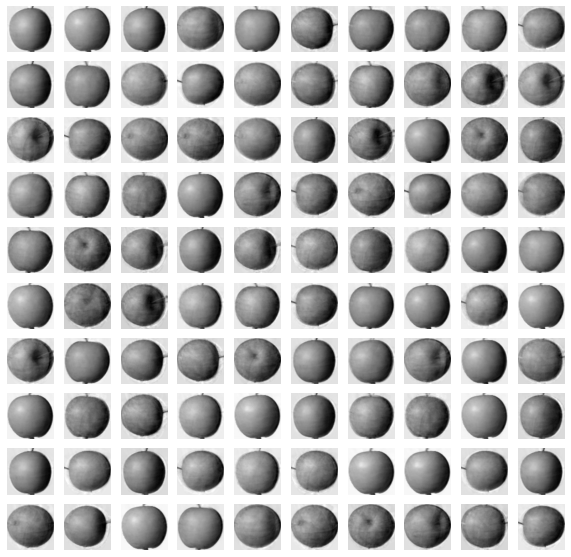

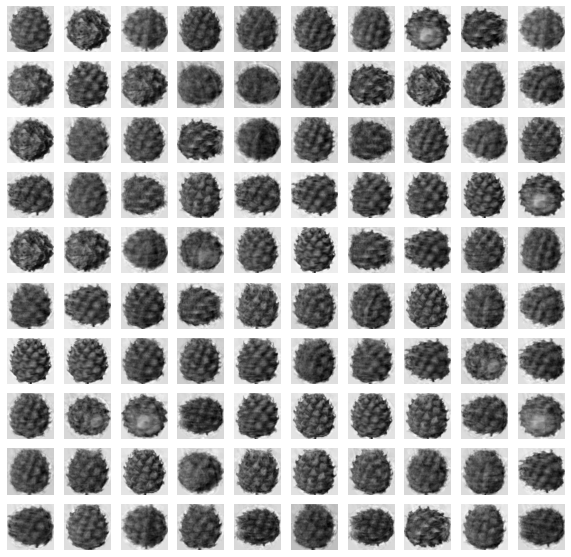

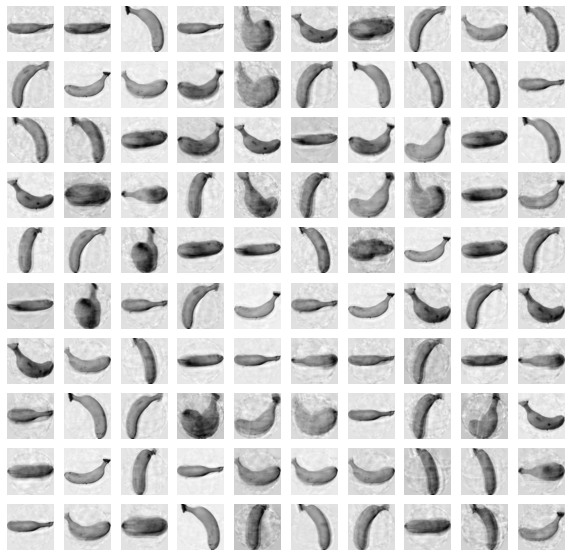

In [27]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200] :
    draw_fruits(fruits_reconstruct[start:start + 100])
    print()

일부 흐리고 번진 부분이 있지만 나름 성공적으로 변환했습니다. 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성했을 것입니다.

### **설명된 분산**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 **설명된 분산(Explained variance)**이라고 합니다. `PCA` 클래스의 `explained_vaiance_ratio_` 속성에 각 주성분의 설명된 분산의 비율이 기록됩니다. 당연히 첫 번째 주성분의 설명된 분산이 가장 큽니다. 이 분산 비율을 모두 더하면 주성분 50개로 표현하는 총 분산 비율을 얻을 수 있습니다.

In [28]:
print(np.sum(pca.explained_variance_ratio_))

0.9214675425099216


92% 이상인 분산을 유지합니다. 원본 데이터로 복원했을 때 원본 이미지 품질이 높은 이유는 설명된 분산의 비율이 높기 때문입니다.

설명된 분산의 비율을 그래프로 그리면 적절한 주성분 개수를 찾을 수 있습니다.

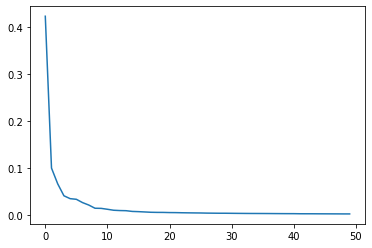

In [29]:
plt.plot(pca.explained_variance_ratio_)

plt.show()

처음 주성분 10개가 분산 대부분을 표현합니다. 그다음부터는 각 주성분이 설명하는 분산은 비교적 작습니다.

### **다른 알고리즘과 함께 사용하기**

원본 데이터를 사용할 때와 어떤 차이가 있는지 확인하기 위해 `PCA` 클래스로 차원이 축소된 데이터를 사용하여 지도학습 모델을 훈련하겠습니다. 과일 사진 3개를 분류해야 하므로 로지스틱 회귀 모델을 사용합니다. 지도학습 모델을 사용하려면 타깃값이 있어야 하므로 사과는 0, 파인애플은 1, 바나나는 2로 지정하겠습니다.

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

먼저 원본 데이터인 `fruits_2d`를 사용하겠습니다. 로지스틱 회귀 모델에서 성능을 가늠하기 위해 `cross_validate()` 함수로 교차 검증을 수행하겠습니다.

In [31]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))    # `fit_time_` 속성에는 교차 검증 폴드의 훈련 시간이 기록됩니다.

0.9966666666666667
1.5343915939331054


교차 검증 점수가 매우 높습니다. 특성이 10,000개나 되므로 샘플 300개에서는 금방 과대적합된 모델을 만들기 쉽습니다.

이번에는 차원 축소 데이터인 `fruits_pca`를 사용하겠습니다.

In [32]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03605036735534668


정확도는 100%이고 훈련 시간은 훨씬 짦습니다. `PCA` 클래스로 훈련 데이터 차원을 축소하면 저장 공간 절약뿐만 아니라 모델 훈련 속도도 제고할 수 있습니다.

`PCA` 클래스를 사용할 때 `n_components` 매개변수에 개수가 아닌 비율(0 ~ 1)을 지정해도 됩니다. 지정한 비율에 도달할 때까지 자동으로 주성분을 찾습니다. 설명된 분산의 50%에 달하는 주성분을 찾도록 지정하겠습니다.

In [33]:
pca = PCA(n_components=0.5) 
pca.fit(fruits_2d)
print(pca.n_components_)

2


특성이 2개입니다. 특성 2개만으로도 원본 데이터에 있는 분산의 50%를 표현할 수 있습니다. 이 모델로 원본 데이터를 변환하겠습니다.

In [34]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


주성분이 2개이므로 변환된 데이터 크기는 `(300, 2)`입니다.

특성 2개만 사용하고도 교차 검증 결과가 좋을지 확인하겠습니다.

In [35]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.04792594909667969


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


로지스틱 회귀 모델이 완전히 수렴하지 못했으니 반복 횟수를 증가하라는 경고가 뜹니다. 교차 검증 결과가 충분히 좋으므로 무시해도 괜찮습니다. 특성 2개로도 정확도 99%를 얻었습니다.

차원이 축소된 데이터를 사용하여 k-평균 알고리즘으로 클러스터를 찾겠습니다.

In [36]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


6-2 파트에서 원본 데이터를 사용했을 때와 거의 비슷한 결과입니다.

`KMeans` 클래스가 찾은 레이블을 사용하여 과일 이미지를 출력하겠습니다.

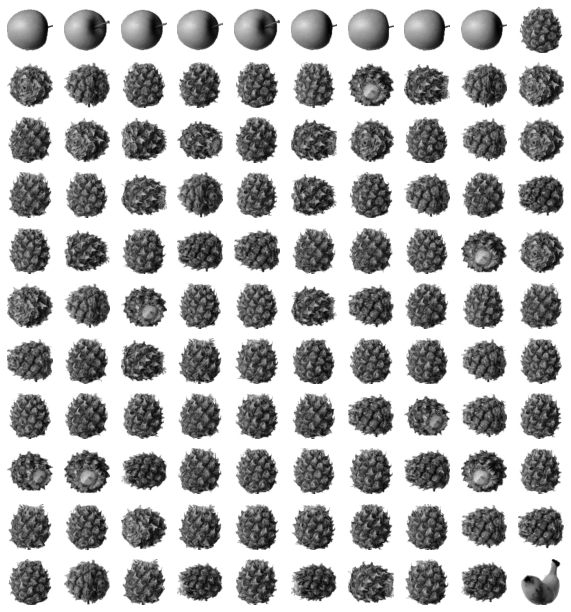

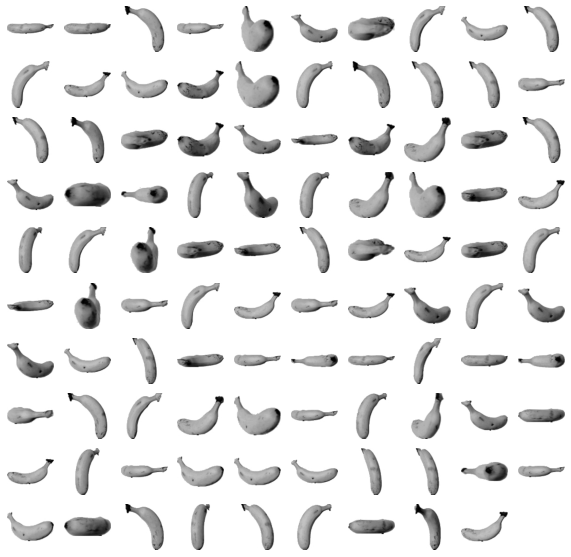

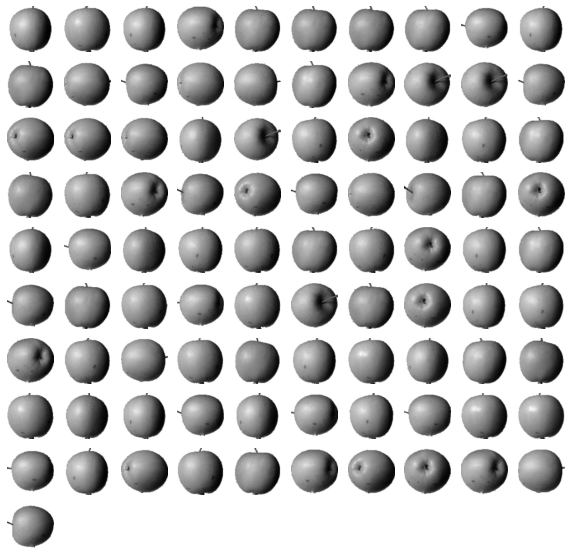

In [37]:
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print()

6-2 파트에서 찾은 클러스터처럼 파인애플은 사과와 바나나가 조금 섞였습니다.

훈련 데이터의 차원을 3개 이하로 줄이면 시각화하기 비교적 쉽습니다. `fruits_pca` 데이터는 특성 2개가 있기 때문에 2차원으로 표현할 수 있습니다. `km.labels_` 속성을 사용하여 클러스터별로 나누고 산점도를 그리겠습니다.

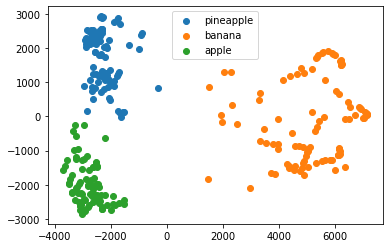

In [40]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])    # x축에는 첫 번째 속성, y축에는 두 번째 속성을 그립니다.
plt.legend(['pineapple', 'banana', 'apple'])

plt.show()

각 클러스터의 산점도가 아주 잘 구분됐습니다. 다만 파인애플과 사과의 경계가 가깝게 붙어 있으므로 위 그림처럼 이 두 클러스터의 샘플 몇 개가 혼동을 일으킨 것입니다.